In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
%matplotlib inline
from torchvision import transforms
import os
import random
from PIL import Image
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

import h5py
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar xzvf food-101.tar.gz

--2023-03-06 20:07:29--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-03-06 20:07:30--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz      34%[=====>              ]   1.62G  15.7MB/s    eta 3m 52s 

## Data Exploration

In [ ]:
os.listdir('food-101/images')

['sashimi',
 'spaghetti_carbonara',
 'greek_salad',
 'baby_back_ribs',
 'crab_cakes',
 'caesar_salad',
 'risotto',
 'chicken_wings',
 'lasagna',
 'beef_carpaccio',
 'foie_gras',
 'french_toast',
 'ramen',
 'bread_pudding',
 'french_fries',
 'sushi',
 'steak',
 'pad_thai',
 'shrimp_and_grits',
 'pho',
 'hummus',
 'croque_madame',
 'onion_rings',
 'lobster_bisque',
 'chicken_quesadilla',
 'hot_dog',
 'churros',
 'tiramisu',
 'red_velvet_cake',
 'prime_rib',
 'deviled_eggs',
 'samosa',
 'club_sandwich',
 'cheesecake',
 'bruschetta',
 'spring_rolls',
 'cheese_plate',
 'strawberry_shortcake',
 'oysters',
 'french_onion_soup',
 'clam_chowder',
 'macaroni_and_cheese',
 'tacos',
 'gyoza',
 'omelette',
 'nachos',
 'pork_chop',
 'falafel',
 'pancakes',
 'gnocchi',
 'huevos_rancheros',
 'scallops',
 'grilled_salmon',
 'tuna_tartare',
 'grilled_cheese_sandwich',
 'cup_cakes',
 'seaweed_salad',
 'baklava',
 'carrot_cake',
 'beignets',
 'fried_calamari',
 'mussels',
 'cannoli',
 'hot_and_sour_soup',

In [ ]:
data_dir = 'food-101/images'
total = 0
path_count = 0
for path in os.listdir(data_dir):
    count = 0 
    path_count += 1
    #print(path)
    food_path = os.path.join(data_dir, path)
    for item in os.listdir(food_path):
      if os.path.isfile(os.path.join(food_path, item)):
        count += 1
        total += 1
    print(f' {path} Image Count: {count}')
print(f' \nTotal Image Count: {total}')
print(f' Class Count: {[path_count]}')   

 sashimi Image Count: 1000
 spaghetti_carbonara Image Count: 1000
 greek_salad Image Count: 1000
 baby_back_ribs Image Count: 1000
 crab_cakes Image Count: 1000
 caesar_salad Image Count: 1000
 risotto Image Count: 1000
 chicken_wings Image Count: 1000
 lasagna Image Count: 1000
 beef_carpaccio Image Count: 1000
 foie_gras Image Count: 1000
 french_toast Image Count: 1000
 ramen Image Count: 1000
 bread_pudding Image Count: 1000
 french_fries Image Count: 1000
 sushi Image Count: 1000
 steak Image Count: 1000
 pad_thai Image Count: 1000
 shrimp_and_grits Image Count: 1000
 pho Image Count: 1000
 hummus Image Count: 1000
 croque_madame Image Count: 1000
 onion_rings Image Count: 1000
 lobster_bisque Image Count: 1000
 chicken_quesadilla Image Count: 1000
 hot_dog Image Count: 1000
 churros Image Count: 1000
 tiramisu Image Count: 1000
 red_velvet_cake Image Count: 1000
 prime_rib Image Count: 1000
 deviled_eggs Image Count: 1000
 samosa Image Count: 1000
 club_sandwich Image Count: 1000

In [ ]:
!ls food-101/images/apple_pie/ | head -10

1005649.jpg
1011328.jpg
101251.jpg
1014775.jpg
1026328.jpg
1028787.jpg
1034399.jpg
103801.jpg
1038694.jpg
1043283.jpg


In [ ]:
#root_dir = 'C:/Users/Om/Desktop/food-101/food-101/images'
image_paths = []

# Collect all the image paths in a list
for path in os.listdir(data_dir):
    food_path = os.path.join(data_dir, path)
    if os.path.isdir(food_path):
        for file in os.listdir(food_path):
            if file.endswith('.jpg'):
                image_paths.append(os.path.join(food_path, file))

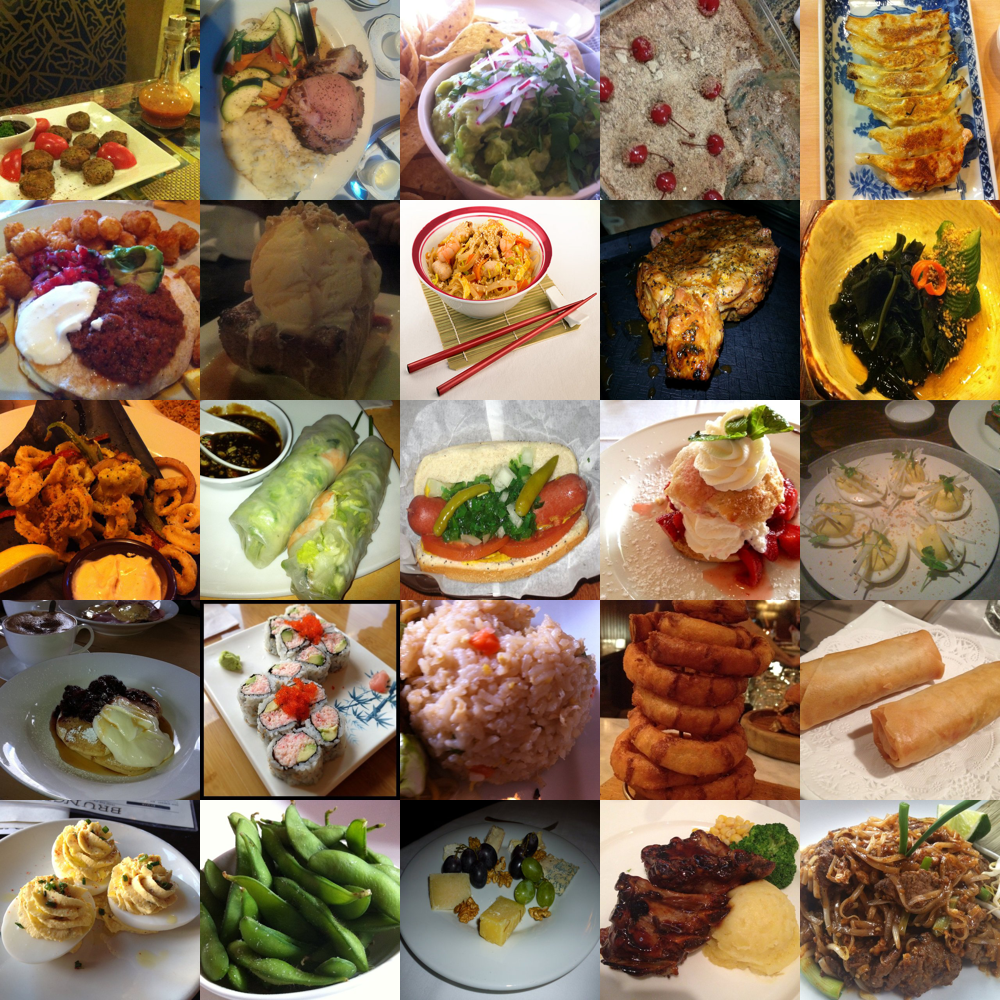

In [ ]:
# Print 30 random images from the list
"""
image_paths = []

# Collect all the image paths in a list
for path in os.listdir(data_dir):
    food_path = os.path.join(data_dir, path)
    if os.path.isdir(food_path):
        for file in os.listdir(food_path):
            if file.endswith('.jpg'):
                image_paths.append(os.path.join(food_path, file))
"""

# Choose 30 random images from the list
random_images = random.sample(image_paths, 25)

# Set the desired size of each image
image_size = (200, 200)

# Create a new image to hold all the images in a grid
grid_size = (5, 5)
grid_image = Image.new('RGB', (image_size[0] * grid_size[0], image_size[1] * grid_size[1]))

# Paste each image into the grid
for i, path in enumerate(random_images):
    with Image.open(path) as img:
        img = img.resize(image_size)
        x = (i % grid_size[0]) * image_size[0]
        y = (i // grid_size[0]) * image_size[1]
        grid_image.paste(img, (x, y))

# Display the grid image
grid_image.show()

## Data Preparation and Pre-processing

In [ ]:
# Define the transformation to normalize the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# Create an empty array to hold all the normalized images
images = np.empty((len(image_paths), 3, 224, 224))

# Loop over all the image paths, normalize each image, and add it to the array
for i, path in enumerate(image_paths):
    print(f"In {i}th image")
    with Image.open(path) as img:
        img = transform(img)
        images[i] = img.numpy()

Streaming output truncated to the last 5000 lines.
In 3541th image
In 3542th image
In 3543th image
In 3544th image
In 3545th image
In 3546th image
In 3547th image
In 3548th image
In 3549th image
In 3550th image
In 3551th image
In 3552th image
In 3553th image
In 3554th image
In 3555th image
In 3556th image
In 3557th image
In 3558th image
In 3559th image
In 3560th image
In 3561th image
In 3562th image
In 3563th image
In 3564th image
In 3565th image
In 3566th image
In 3567th image
In 3568th image
In 3569th image
In 3570th image
In 3571th image
In 3572th image
In 3573th image
In 3574th image
In 3575th image
In 3576th image
In 3577th image
In 3578th image
In 3579th image
In 3580th image
In 3581th image
In 3582th image
In 3583th image
In 3584th image
In 3585th image
In 3586th image
In 3587th image
In 3588th image
In 3589th image
In 3590th image
In 3591th image
In 3592th image
In 3593th image
In 3594th image
In 3595th image
In 3596th image
In 3597th image
In 3598th image
In 3599th image
In 36

RuntimeError: ignored

In [ ]:
# TODO: We have different shape which prevents us to process transform (image_paths[8540] is gray-scaled image (single channel image))
np.array(Image.open(image_paths[8540])).shape

(348, 512)

In [ ]:
np.array(Image.open(image_paths[8539])).shape

(512, 384, 3)

In [ ]:
images[8545].shape

(3, 224, 224)

## Train the model (several model: CNN, RNN, Pretrained-cNN, ... )

## Evaluate the model

## Fine-Tuning the model

## Evaluate Fine-Tuned model

## Conclusion (Select best model and give some explain)